In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

### 데이터 수집 및 전처리
## 관광지 추천 사이트에서 제주 추천 관광지 데이터 직접 추출
- 관광지 명 데이터 수집은 직접 긁어오는 것이 효율적일 것이라 판단
- 활용 데이터
    + https://www.tripadvisor.co.kr/Attractions-g297885-Activities-Jeju_Jeju_Island.html
    + https://kr.hotels.com/go/south-korea/kr-best-jeju-island-things-to-do
    + https://jejuiljung.com/kor/pgm/course/theme.php?tag=%EB%AC%B4%EB%A3%8C
    + https://kr.trip.com/toplist/tripbest/jeju-natural-wonders-100001409580/?locale=ko-KR&curr=KRW
    + https://kr.trip.com/toplist/tripbest/jeju-best-museums-100001409579/?locale=ko-KR&curr=KRW
    + https://www.expedia.co.kr/stories/8717-2/
    + https://www.visitjeju.net/kr/detail/list?menuId=DOM_000001718000000000&cate1cd=cate0000000002#p1&pageSize=15&sortListType=reviewcnt&viewType=list&isShowBtag&tag
      - 상위 30개 데이터
    + https://www.jejunews.com/news/articleView.html?idxno=2195491
    + https://www.google.com/search?q=%EC%A0%9C%EC%A3%BC+%EA%B4%80%EA%B4%91%EC%A7%80&sca_esv=565257361&sxsrf=AM9HkKmaBfC4JZzcFJV7rX3HTdPhPCmAxQ%3A1694675178090&ei=6rACZfCLBZahhwOnjpDoCQ&ved=0ahUKEwjwqP__xKmBAxWW0GEKHScHBJ0Q4dUDCBA&uact=5&oq=%EC%A0%9C%EC%A3%BC+%EA%B4%80%EA%B4%91%EC%A7%80&gs_lp=Egxnd3Mtd2l6LXNlcnAiEOygnOyjvCDqtIDqtJHsp4AyBxAjGIoFGCcyBRAAGIAEMgUQABiABDIFEAAYgAQyChAAGIAEGBQYhwIyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAESJsNUABYgwNwAHgAkAEAmAGZAaAB7AKqAQMwLjO4AQPIAQD4AQHCAgQQABge4gMEGAAgQYgGAQ&sclient=gws-wiz-serp#ttdcs=EAE
    + https://lilleat.com/jeju-top-10/

In [5]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')
trip_advisor = '한림공원, 비자림, 제주 돌문화 공원, 제주 절물 자연 휴양림, 제주 4.3 평화공원, 한라 수목원, 우도등대공원, 사라봉공원, 함덕 서우봉 해변, 협재 해수욕장, 월정리 해변, 세화 해수욕장, 이호테우 해변, 금능해수욕장, 김녕 성세기 해변, 곽지 해수욕장, 에코랜드 테마파크, 제주 유리의 성, 테지움 제주, 더 마 파크, 제주 공룡 랜드, 제주미니미니랜드, 파크 써던랜드, 스누피 가든, 한림공원, 제주김녕미로공원, 메이즈랜드, 다희연, 김경숙해바라기농장, 제주불빛정원, 카페 글렌코, 토끼섬, 수월봉, 제주김녕미로공원, 신비의 도로, 용두암, 신창 풍차해안도로, 항파두리 항몽, 제주불빛정원, 수월봉, 한담해안산책로, 신창 풍차해안도로, 검멀레, 서우봉, 관음사탐방로, 왕따나무, 민오름 - 오라동, 녹산로유채꽃길, 우도, 만장굴, 함덕 서우봉 해변, 동문 재래시장, 협재 해수욕장, 한림공원, 에코랜드 테마파크, 비자림, 산굼부리 분화구, 한라산 성판악. 해녀 박물관, 성읍 민속마을 '
hotels = '한라산, 성산일출봉, 섭지코지, 만장굴, 우도, 추자도, 국립제주박물관, 성읍민속마을, 휴애리 자연생활공원, 제주 올레'
jeju_iljung = '섭지코지, 용두암&용연, 오설록티뮤지엄, 사계해안, 하귀↔애월 해안도로, 쇠소깍 , 한담해안산책로 , 월정리해변 , 제주시 동문재래시장 , 신비의도로(경유) , 협재해수욕장(산책) , 외돌개 , 새연교 , 1100고지습지 , 서귀포매일올레시장'
trip = '제주특별자치도 민속 자연사 박물관, 브릭캠퍼스 제주, 제주해녀박물관, 국립제주박물과느, 삼성혈, 수목원테마파크, 제주민속박물관, 테지움 제주, 아라리오뮤지엄, 메이즈랜드, 제주현대미술관'
trip2 = '우도, 한라산 국립공원, 용두암, 에코랜드, 산굼부리, 월정리 갈비밥, 만장굴, 한림공원, 용연구름다리, 김녕 미로공원, 제주 돌문화공원, 사려니숲길, 백록담, 거문오름'
expedia = '섭지코지, 방주 교회, 성이시돌 목장, 김경숙 해바라기 농장, 이중섭 문화거리, 돈내코 원앙폭포, 오설록 티 뮤지엄, 신천 목장'
visit_jeju = '우도, 성산일출봉, 사려니숲길, 카멜리아힐, 협재해수욕장, 월정리해변, 함덕해수욕장, 산굼부리, 새별오름, 섭지코지, 오설록티뮤지엄, 한라산국립공원, 제주4.3평화공원, 에코랜드테마파크, 용눈이오름, 비자림, 천지연폭포, 세화해변, 우도산호해변 홍조단괴 서빈백사, 광치기해변, 김녕해수욕장, 아쿠아플라넷 제주, 송악산, 쇠소깍, 금능 해수욕장, 마라도, 애월해안도로, 곽지해수욕장, 용머리해안, 한라산영실코스'
news = '동문재래시장, 서귀포매일올레시장, 성산일출봉, 함덕해수욕장, 협재해수욕장, 이호테우해수욕장, 아르떼뮤지엄 제주, 섭지코지, 곽지해수욕장, 비자림, 금능해수욕장, 김녕해수욕장, 천지연폭포, 금오름, 제주민속오일시장, 수목원길야시장, 사려니숲길, 제주민속촌'
google = '협재해변, 함덕해수욕장, 만장굴, 월정리 해수욕장, 한림공원, 산굼부리, 에코랜드, 오설록 티 뮤지엄, 우도, 섭지코지, 비자림, 한라수목원'
top_10 = '외돌개, 천제연폭포, 성산일출봉, 용머리해안, 주상절리대, 정방폭포, 에코랜드, 섭지코지, 용두암, 오설록 티 뮤지엄'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 관광지 데이터 토큰화

In [8]:
import re
import pandas as pd

class Seq1:
    def __init__(self, input_string):
        self.input_string = input_string
        self.tokens = None  # 토큰 리스트를 저장할 변수 초기화

    def remove_spaces(self):
        self.input_string = self.input_string.replace(' ', '')

    def remove_commas(self):
        self.input_string = self.input_string.replace(',', ' ')
    def remove_some(self):
        self.input_string = self.input_string.replace('국립공원', ' ')
    def tokenize_words(self):
        self.tokens = nltk.word_tokenize(self.input_string)  # 토큰 리스트 저장
        self.input_string = ' '.join(self.tokens)

    def process_string(self):
        self.remove_spaces()
        self.remove_commas()
        self.remove_some()
        self.tokenize_words()

        return self

trip_adv_tokens = Seq1(trip_advisor).process_string().tokens
hotels_tokens = Seq1(hotels).process_string().tokens
iljung_tokens = Seq1(jeju_iljung).process_string().tokens
trip_tokens = Seq1(trip).process_string().tokens
trip2_tokens = Seq1(trip2).process_string().tokens
expedia_tokens =Seq1(expedia).process_string().tokens
visit_jeju_tokens = Seq1(visit_jeju).process_string().tokens
news_tokens = Seq1(news).process_string().tokens
google_tokens = Seq1(google).process_string().tokens
top_10_tokens = Seq1(top_10).process_string().tokens

In [9]:
from nltk import word_tokenize
words = trip_adv_tokens+hotels_tokens+iljung_tokens+trip_tokens+trip2_tokens+expedia_tokens+visit_jeju_tokens+news_tokens+google_tokens+top_10_tokens
words = [word for word in words if word not in ['(', ')', '&']]
print(words)


['한림공원', '비자림', '제주돌문화공원', '제주절물자연휴양림', '제주4.3평화공원', '한라수목원', '우도등대공원', '사라봉공원', '함덕서우봉해변', '협재해수욕장', '월정리해변', '세화해수욕장', '이호테우해변', '금능해수욕장', '김녕성세기해변', '곽지해수욕장', '에코랜드테마파크', '제주유리의성', '테지움제주', '더마파크', '제주공룡랜드', '제주미니미니랜드', '파크써던랜드', '스누피가든', '한림공원', '제주김녕미로공원', '메이즈랜드', '다희연', '김경숙해바라기농장', '제주불빛정원', '카페글렌코', '토끼섬', '수월봉', '제주김녕미로공원', '신비의도로', '용두암', '신창풍차해안도로', '항파두리항몽', '제주불빛정원', '수월봉', '한담해안산책로', '신창풍차해안도로', '검멀레', '서우봉', '관음사탐방로', '왕따나무', '민오름-오라동', '녹산로유채꽃길', '우도', '만장굴', '함덕서우봉해변', '동문재래시장', '협재해수욕장', '한림공원', '에코랜드테마파크', '비자림', '산굼부리분화구', '한라산성판악.해녀박물관', '성읍민속마을', '한라산', '성산일출봉', '섭지코지', '만장굴', '우도', '추자도', '국립제주박물관', '성읍민속마을', '휴애리자연생활공원', '제주올레', '섭지코지', '용두암', '용연', '오설록티뮤지엄', '사계해안', '하귀↔애월해안도로', '쇠소깍', '한담해안산책로', '월정리해변', '제주시동문재래시장', '신비의도로', '경유', '협재해수욕장', '산책', '외돌개', '새연교', '1100고지습지', '서귀포매일올레시장', '제주특별자치도민속자연사박물관', '브릭캠퍼스제주', '제주해녀박물관', '국립제주박물과느', '삼성혈', '수목원테마파크', '제주민속박물관', '테지움제주', '아라리오뮤지엄', '메이즈랜드', '제주현대미술관', '우도', '한라산', '용두암', '에코랜드', '산굼부리', '월정리갈비밥', '만장굴', 

In [ ]:
!pip install konlpy
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [15]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

counts = Counter(words)
tags = counts.most_common(60)
print(tags)

[('섭지코지', 7), ('한림공원', 5), ('비자림', 5), ('협재해수욕장', 5), ('우도', 5), ('오설록티뮤지엄', 5), ('용두암', 4), ('만장굴', 4), ('성산일출봉', 4), ('월정리해변', 3), ('금능해수욕장', 3), ('곽지해수욕장', 3), ('에코랜드테마파크', 3), ('한라산', 3), ('에코랜드', 3), ('산굼부리', 3), ('사려니숲길', 3), ('함덕해수욕장', 3), ('제주돌문화공원', 2), ('제주4.3평화공원', 2), ('한라수목원', 2), ('함덕서우봉해변', 2), ('테지움제주', 2), ('제주김녕미로공원', 2), ('메이즈랜드', 2), ('김경숙해바라기농장', 2), ('제주불빛정원', 2), ('수월봉', 2), ('신비의도로', 2), ('신창풍차해안도로', 2), ('한담해안산책로', 2), ('동문재래시장', 2), ('성읍민속마을', 2), ('쇠소깍', 2), ('외돌개', 2), ('서귀포매일올레시장', 2), ('천지연폭포', 2), ('김녕해수욕장', 2), ('용머리해안', 2), ('제주절물자연휴양림', 1), ('우도등대공원', 1), ('사라봉공원', 1), ('세화해수욕장', 1), ('이호테우해변', 1), ('김녕성세기해변', 1), ('제주유리의성', 1), ('더마파크', 1), ('제주공룡랜드', 1), ('제주미니미니랜드', 1), ('파크써던랜드', 1), ('스누피가든', 1), ('다희연', 1), ('카페글렌코', 1), ('토끼섬', 1), ('항파두리항몽', 1), ('검멀레', 1), ('서우봉', 1), ('관음사탐방로', 1), ('왕따나무', 1), ('민오름-오라동', 1)]


### 워드 클라우드 시각화

In [12]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

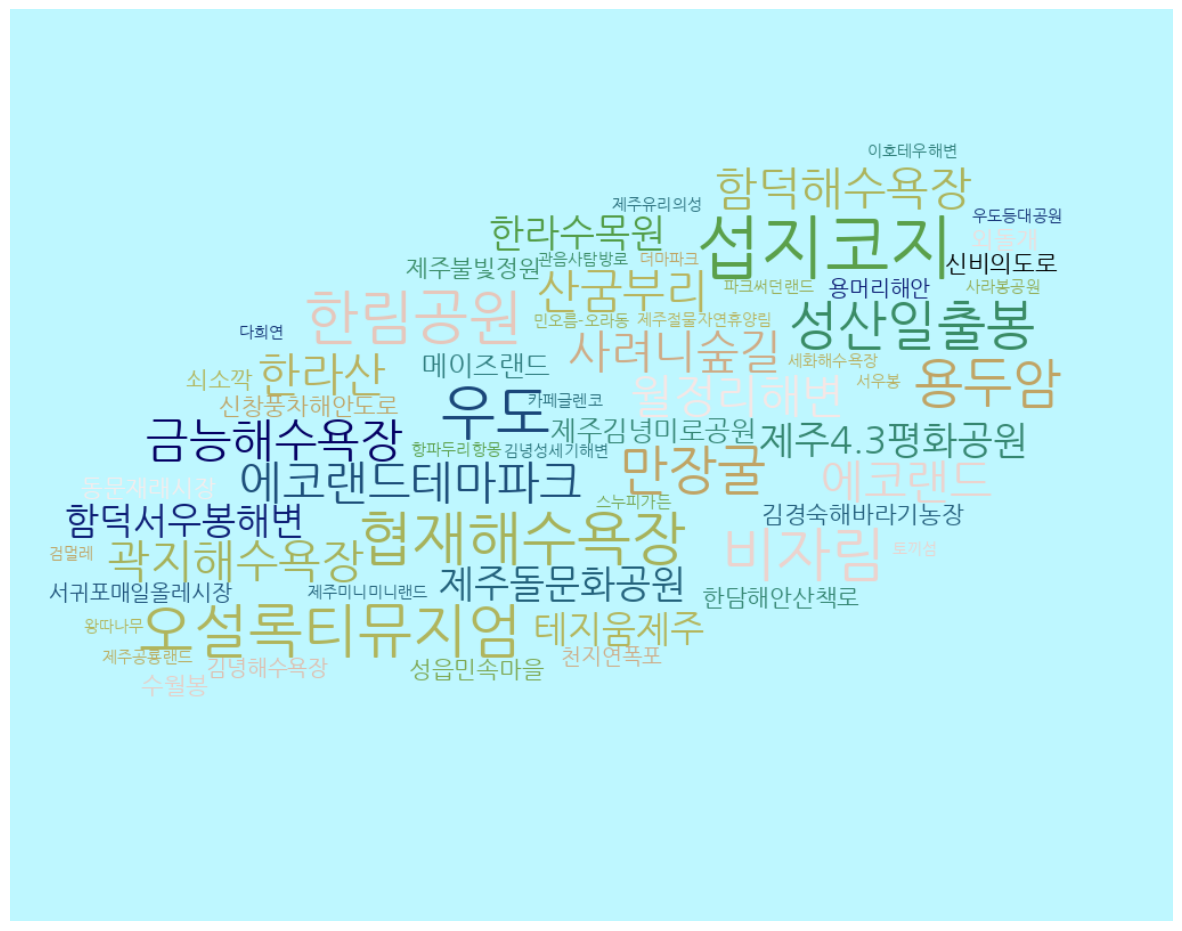

In [20]:
im = Image.open('jeju.png') # 이미지 파일 읽어오기
mask_arr = np.array(im) # 픽셀 값 배열 형태 변환
background_color = (190, 247, 255)
wc = WordCloud(font_path=FONT_PATH,background_color=background_color,
               max_font_size=60,
               width=1010, height=800,
               mask=mask_arr,
               prefer_horizontal=True,
               colormap='gist_earth_r'
               )
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cloud, interpolation='bilinear')
plt.show()